
Missing Values- Feature Engineering- Day

Lifecycle of a Data Science Projects

    Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
    Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey

    They hesitate to put down the information
    Survey informations are not that valid
    Men--salary
    Women---age
    People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources
What are the different types of Missing Data?

##### Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


##### Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [8]:
import numpy as np

df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
# % of null values
df['cabin_null'].mean()

0.7710437710437711

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [11]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Missing At Random(MAR)


### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


# 1 Mean/ MEdian /Mode imputation

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables


In [16]:
df = pd.read_csv('../Data/train.csv', usecols=['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [19]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [20]:
def impute_nan(df, variable, median):
  df[variable+"_median"] = df[variable].fillna(median)  

In [21]:
median = df.Age.median()
median

28.0

In [22]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [24]:
df.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [25]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

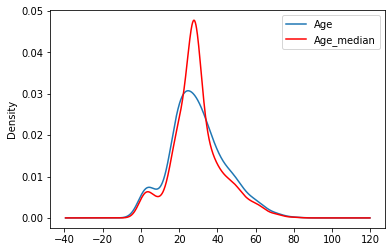

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels =ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages And Disadvantages of Mean/Median Imputation

Advantages

    Easy to implement(Robust to outliers)
    Faster way to obtain the complete dataset #### Disadvantages
    Change or Distortion in the original variance
    Impacts Correlation



# 2 Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)


In [1]:
import pandas as pd
df = pd.read_csv('../Data/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [8]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [20]:
df['Age'].dropna().sample() #everytime u get different value

224    38.0
Name: Age, dtype: float64

In [22]:
#u need 177 different random values
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [24]:
def impute_nan_random_sample(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    #Now fetch N diffrent random samples to fill the missing values where N is sum(missing val)
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    #pandas need to have same index to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [25]:
median = df.Age.median()

In [26]:
median

28.0

In [27]:
impute_nan_random_sample(df, "Age", median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

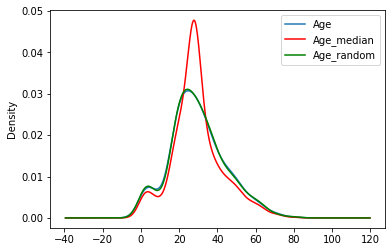

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [59]:
def plot_distrub(features):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df[features[0]].plot(kind='kde', ax=ax)
    df[features[1]].plot(kind='kde', ax=ax, color='red')
    df[features[2]].plot(kind='kde', ax=ax, color='green')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

# # Advantages

    Easy To implement
    There is less distortion in variance

Disadvantage

    Every situation randomness wont work

 
 
 
 
 
 
 
 # # 3 Capturing NAN values with a new feature

It works well if the data are not missing completely at random


In [38]:
df = pd.read_csv('../Data/train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [39]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

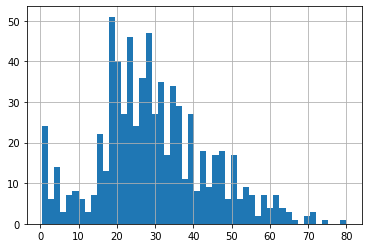

In [40]:
df.Age.hist(bins=50)

# Advantages
1. easy to implement
2. captures imporatance of missing value

In [41]:
df.Age.median()

28.0

In [42]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [44]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [45]:
df['Age'].fillna(df.Age.median(), inplace=True)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0



# Advantages

    Easy to implement
    Captures the importance of missing values

# Disadvantages

    Creating Additional Features(Curse of Dimensionality)

# 4 End of Distribution imputation


In [65]:
df = pd.read_csv('../Data/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


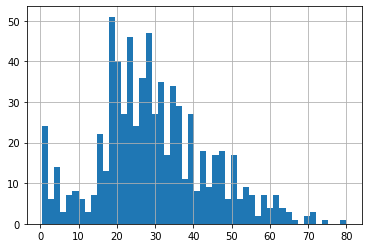

In [66]:
df.Age.hist(bins=50)

In [67]:
df.Age.mean()

29.69911764705882

In [68]:
# pick the end of distrb data i.e 3rd std deviation of the distrib
extreme = df.Age.mean()+3*df.Age.std()

In [69]:
extreme

73.27860964406094

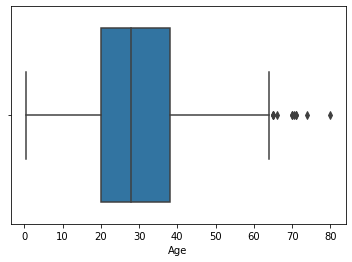

In [70]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [71]:
def impute_nan_EOD(df, variable, median, extreme):
    df[variable+"_medain"] = df[variable].fillna(median)
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [72]:
impute_nan_EOD(df,'Age', df.Age.median(), extreme)
df.head()

,Survived,Age,Fare,Age_medain,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


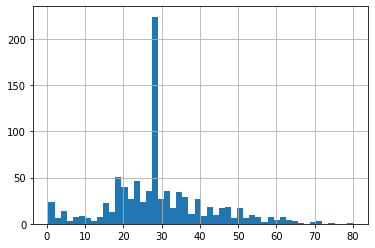

In [73]:
df['Age'].hist(bins=50)

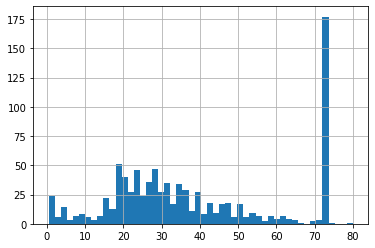

In [74]:
df['Age_end_distribution'].hist(bins=50)

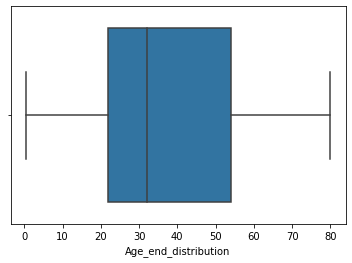

In [75]:
sns.boxplot('Age_end_distribution', data=df)

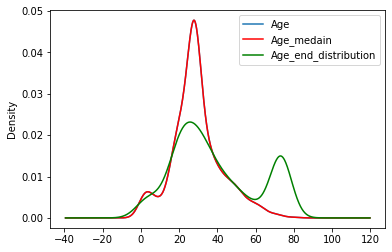

In [77]:
plot_distrub(['Age','Age_medain','Age_end_distribution'])


# 5. Arbitrary Value Imputation

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value


In [1]:
import pandas as pd
df = pd.read_csv('../Data/train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
def impute_nan_arbitary(df,variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundrad'] = df[variable].fillna(100)
    

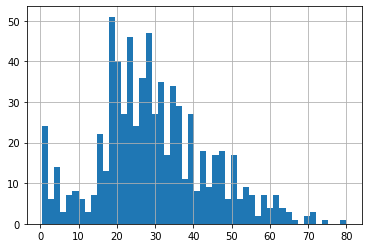

In [3]:
df['Age'].hist(bins=50)


# Advantages

    Easy to implement
    Captures the importance of missingess if there is one

# Disadvantages

    Distorts the original distribution of the variable
    If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
    Hard to decide which value to use




# How To Handle Categroical Missing Values
# 1 Frequent Category Imputation

In [7]:
import pandas as pd
df=pd.read_csv('../Data/house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [8]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [9]:
df.shape

(1460, 4)

In [11]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [14]:
df.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [15]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

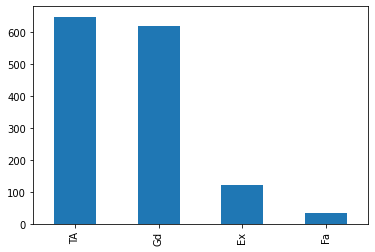

In [17]:
df['BsmtQual'].value_counts().plot.bar()

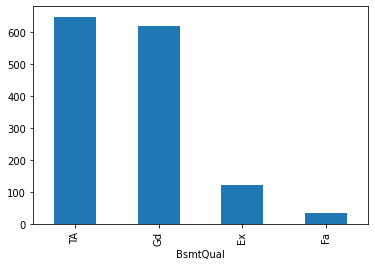

In [19]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

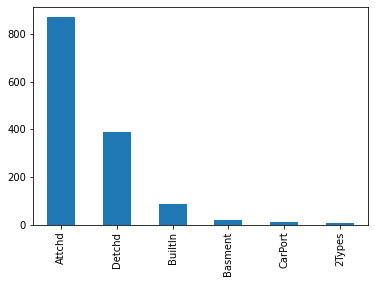

In [20]:
df['GarageType'].value_counts().plot.bar()

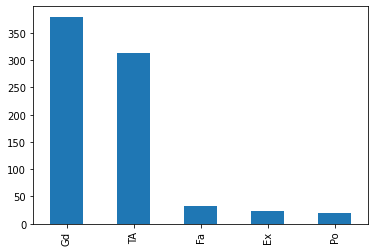

In [21]:
df['FireplaceQu'].value_counts().plot.bar()

In [26]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [27]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [29]:
df['GarageType'].mode()[0]

'Attchd'

In [30]:
def impute_nan_categorical(df, variable):
    most_frequent_category = df[variable].mode()[0]
    df[variable].fillna(most_frequent_category, inplace=True)

In [31]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan_categorical(df,feature)

In [32]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [33]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64


# Advantages

    Easy To implement
    Fater way to implement #### Disadvantages
    Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
    It distorts the relation of the most frequent label



# 2. Adding a variable to capture NAN¶

In [35]:
df=pd.read_csv('../Data/house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [37]:
import numpy as np
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(),1,0)
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [40]:
frequent=df['BsmtQual'].mode()[0]

In [43]:
df['BsmtQual'].fillna(frequent, inplace=True)

In [44]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [45]:
df['FireplaceQu_Var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)

In [46]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0



# Suppose if you have more frequent categories, we just replace NAN with a new category

In [47]:
df=pd.read_csv('../Data/house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [48]:
def impute_nan_new_category(df, variable):
        df[variable+'_newvar'] = np.where(df[variable].isnull(),"Missing",df[variable])
    

In [50]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan_new_category(df, feature)

In [52]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


In [53]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'], axis=1)
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd



# Handle Categorical Features
#  3 One Hot Encoding

In [55]:
import pandas as pd
df = pd.read_csv('../Data/train.csv', usecols=['Sex'])

In [56]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [58]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [59]:
pd.get_dummies(df, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [60]:
df = pd.read_csv('../Data/train.csv', usecols=['Embarked'])

In [61]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [62]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [64]:
df.isnull().sum()

Embarked    2
dtype: int64

In [65]:
df.dropna(inplace=True)

In [66]:
df.isnull().sum()

Embarked    0
dtype: int64

In [68]:
pd.get_dummies(df).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [69]:
pd.get_dummies(df, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


# Onehotencoding with many categories in a feature

In [72]:
df= pd.read_csv('../Data/mercedes.csv')
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df= pd.read_csv('../Data/mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [75]:
df.shape

(4209, 7)

In [76]:
for i in df.columns:
    print(i, len(df[i].unique()))

X0 47
X1 27
X2 44
X3 7
X4 4
X5 29
X6 12


In [78]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [80]:
freq_list_10 = df.X1.value_counts().sort_values(ascending=False).head(10).index
freq_list_10 = list(freq_list_10)

In [81]:
freq_list_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [82]:
import numpy as np
for categories in freq_list_10:
    df[categories] = np.where(df['X1']==categories,1,0)

In [83]:
freq_list_10.append('X1')

In [84]:
df[freq_list_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r



# 4 Ordinal Number Encoding

In [1]:
import datetime

In [3]:
today_date = datetime.datetime.today()

In [4]:
today_date

datetime.datetime(2020, 7, 28, 19, 17, 20, 273866)

In [5]:
today_date - datetime.timedelta(3)

datetime.datetime(2020, 7, 25, 19, 17, 20, 273866)

In [6]:
days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [7]:
import pandas as pd
data = pd.DataFrame(days)
data.columns= ["Day"]

In [8]:
data.head()

,Day
0,2020-07-28 19:17:20.273866
1,2020-07-27 19:17:20.273866
2,2020-07-26 19:17:20.273866
3,2020-07-25 19:17:20.273866
4,2020-07-24 19:17:20.273866


In [11]:
data['weekday'] = data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2020-07-28 19:17:20.273866,Tuesday
1,2020-07-27 19:17:20.273866,Monday
2,2020-07-26 19:17:20.273866,Sunday
3,2020-07-25 19:17:20.273866,Saturday
4,2020-07-24 19:17:20.273866,Friday


In [12]:
dict={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7   
}

In [13]:
dict

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [14]:
data['weekday_ordinal'] = data['weekday'].map(dict)
data.head()

,Day,weekday,weekday_ordinal
0,2020-07-28 19:17:20.273866,Tuesday,2
1,2020-07-27 19:17:20.273866,Monday,1
2,2020-07-26 19:17:20.273866,Sunday,7
3,2020-07-25 19:17:20.273866,Saturday,6
4,2020-07-24 19:17:20.273866,Friday,5


# 5 Count Or Frequency Encoding

In [29]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
columns = [1,3,5,6,7,8,9,13]

In [31]:
train_set = train_set[columns]
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [32]:


train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']



In [33]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [34]:
train_set.describe()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [35]:
for feature in train_set.columns:
    print(feature," : ",len(train_set[feature].unique()),' labels')

Employment  :  9  labels
Degree  :  16  labels
Status  :  7  labels
Designation  :  15  labels
family_job  :  6  labels
Race  :  5  labels
Sex  :  2  labels
Country  :  42  labels


In [36]:
country_map = train_set['Country'].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Trinadad&Tobago': 19,
 ' Cambodia': 19,
 ' Thailand': 18,
 ' Laos': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Hungary': 13,
 ' Honduras': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [37]:
train_set['Country'] = train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170



# Advantages

    Easy To Use
    Not increasing feature space ##### Disadvantages
    It will provide same weight if the frequencies are same

# 6 Target Guided Ordinal Encoding

    Ordering the labels according to the target
    Replace the labels by the joint probability of being 1 or 0



In [38]:
import pandas as pd
df = pd.read_csv('../Data/train.csv', usecols=['Cabin', 'Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [39]:
df['Cabin'].fillna('Missing', inplace=True)

In [41]:
df.head(20)

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
5,0,Missing
6,0,E46
7,0,Missing
8,1,Missing
9,1,Missing


In [43]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [44]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [45]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [47]:
df.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [48]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [49]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [50]:
enumerate(ordinal_labels,0)

In [51]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [52]:
df['Cabin_ordinal_labels'] = df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


# 7 Mean Encoding

In [54]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [55]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [56]:
df['mean_ordinal_encoding'] = df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encoding
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


# 8 Probability ratio encoding

In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('../Data/train.csv', usecols=['Cabin', 'Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [59]:
df['Cabin'].fillna('Missing', inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [60]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [61]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [62]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [63]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [65]:
prob_df = pd.DataFrame(prob_df)
prob_df.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [67]:
prob_df['Died'] = 1-prob_df['Survived']
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [68]:
prob_df['Probability_ratio'] = prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [70]:
probability_encoded = prob_df['Probability_ratio'].to_dict()

In [71]:
df['Cabin_encoded'] = df['Cabin'].map(probability_encoded)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


In [72]:
df.head(20)

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274
